<a href="https://colab.research.google.com/github/ajitjadhav10/UMBC/blob/main/DATA%20602/Data_602_HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing important libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
from sklearn.datasets import load_wine

In [89]:
wine_data=load_wine()
dir(wine_data)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [91]:
#printing the feature names

print(wine_data.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [97]:
df_1=pd.read_csv('https://archive.ics.uci.edu/ml/''machine-learning-databases/wine/wine.data',header=None)
df_1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
X=df_1.iloc[:,1:].values
Y=df_1.iloc[:,0].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=3)

In [ ]:
X_train.shape,Y_train.shape

((124, 13), (124,))

In [ ]:
X_test.shape,Y_test.shape

((54, 13), (54,))

Standardizing the features

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train_1 = sc.fit_transform(X_train)
X_test_1 = sc.transform(X_test)

In [ ]:
covariance_mat = np.cov(X_train_1.T)
eigen_value, eigen_vector = np.linalg.eig(covariance_mat)

In [ ]:
eigen_value

array([4.72239672, 2.65014177, 1.469923  , 0.97185309, 0.86473551,
       0.5937659 , 0.47965669, 0.1087108 , 0.35533811, 0.16853458,
       0.19544581, 0.27864645, 0.24654264])

In [ ]:
eigen_vector

array([[-0.08100188,  0.48178435,  0.28875096, -0.07026467,  0.22234739,
        -0.21902764, -0.11007574,  0.02333541, -0.3444016 ,  0.2583164 ,
         0.09113023,  0.59795485, -0.10835627],
       [ 0.25990703,  0.19382461, -0.14133464,  0.54392463,  0.1530603 ,
        -0.50955856, -0.34027657,  0.03640715,  0.04992223, -0.20195765,
         0.10004793, -0.24249198, -0.25839658],
       [ 0.04350008,  0.38292981, -0.51046193, -0.32610074, -0.04613912,
        -0.22259356,  0.18198236, -0.19076829, -0.03056286,  0.14573842,
        -0.55130403, -0.1387536 , -0.13420182],
       [ 0.24549129,  0.04780404, -0.62172486, -0.07001463, -0.10155709,
         0.12348456,  0.09924428,  0.10706623, -0.36452928, -0.01720916,
         0.582326  ,  0.11390242,  0.1177921 ],
       [-0.15470862,  0.32575307, -0.05191957,  0.04194073, -0.76252436,
         0.04919507, -0.30151051,  0.07451778,  0.34963887, -0.0942196 ,
         0.05153919,  0.22631729,  0.01303841],
       [-0.3829028 ,  0.101300

In [ ]:
# calculate cumulative sum of explained variances
tot_1 = sum(eigen_value)


var_explained = [(i / tot_1) for i in sorted(eigen_value, reverse=True)]
cum_var_explained = np.cumsum(var_explained)

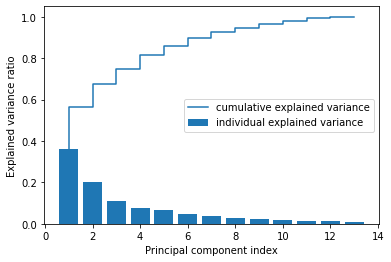

In [ ]:
plt.bar(range(1,14), var_explained,label='individual explained variance')
plt.step(range(1,14), cum_var_explained,label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend()
plt.show()

- From the plot we can see that that the first principal component alone accounts for nearly 40% of the variance. 
- Along with that, we can see that the first two principal components combined explain around 60% of the variance.


In [ ]:
#make a list of (eigen values and eigen vectors) tuples

eigen_pair = [(np.abs(eigen_value[i]), eigen_vector[:, i]) for i in range(len(eigen_value))]

In [ ]:
#Sorting the (eigenvalue, eigenvector) tuples from high to low.

eigen_pair.sort(key=lambda k: k[0], reverse=True)

In [ ]:
#Print the projection matrix W

w = np.hstack((eigen_pair[0][1][:, np.newaxis], eigen_pair[1][1][:, np.newaxis]))
print('Matrix W:', w)

Matrix W: [[-0.08100188  0.48178435]
 [ 0.25990703  0.19382461]
 [ 0.04350008  0.38292981]
 [ 0.24549129  0.04780404]
 [-0.15470862  0.32575307]
 [-0.3829028   0.10130035]
 [-0.41471896  0.04541032]
 [ 0.29906684  0.02053585]
 [-0.30132025  0.06448078]
 [ 0.13973101  0.48900098]
 [-0.33408197 -0.21314208]
 [-0.38406066 -0.11037089]
 [-0.24962912  0.40204944]]


In [ ]:
"""Using the projection matrix, transform a sample x onto the PCA subspace (the
principal components 1 and 2). Transform the entire 124 x 13-dimensional training
dataset onto the two principal components by calculating the matrix dot product."""

X_train_1[0].dot(w)
X_train_pca = X_train_1.dot(w)

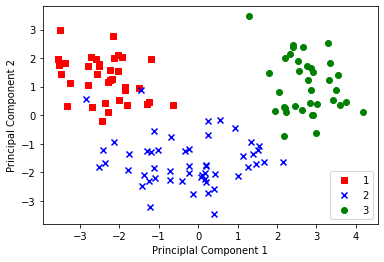

In [ ]:
#Visualize the transformed Wine training set into a two-dimensional scatterplot

color = ['r', 'b', 'g']
marker = ['s', 'x', 'o']

for a, b, c in zip(np.unique(Y_train), color, marker):
    plt.scatter(X_train_pca[Y_train==a, 0], X_train_pca[Y_train==a, 1], c=b, label=a, marker=c) 

plt.xlabel('Principlal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Importing LogisticRegression and PCA.
# intializing PCA and Logistic Regression Model
# fitting and transforming the data

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='auto', solver='liblinear')

X_train_pca = pca.fit_transform(X_train_1)
X_test_pca = pca.transform(X_test_1)
lr.fit(X_train_pca, Y_train)

LogisticRegression(solver='liblinear')

In [ ]:
from matplotlib.colors import ListedColormap



def plot_decision_regions(X, Y, classifier,resolution=0.03):
    
    markers = ('s', 'x', 'o', '^', 'v')# setting up marker generator and color map
    colors = ('red', 'blue', 'green', 'gray', 'yellow')
    cmap = ListedColormap(colors[:len(np.unique(Y))])

    # Plotting the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max,resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z,alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(Y)):
        plt.scatter(x=X[Y == cl, 0], y=X[Y == cl, 1], alpha=0.6, c=[cmap(idx)],edgecolor='black',marker=markers[idx], label=cl)# plot decision regions for training set

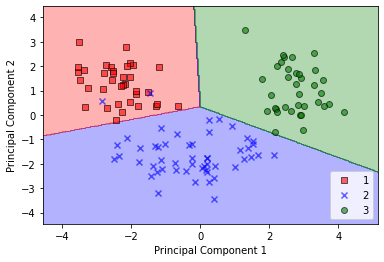

In [ ]:
plot_decision_regions(X_train_pca, Y_train, classifier=lr)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower right')
plt.show()

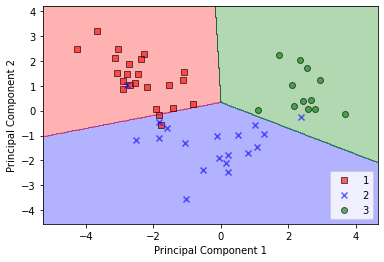

In [ ]:
# Plotting decision regions for the test set


plot_decision_regions(X_test_pca, Y_test, classifier=lr)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower right')
plt.show()

In [ ]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_1)
pca.explained_variance_ratio_

array([0.36033176, 0.20221305, 0.11215914, 0.07415504, 0.06598168,
       0.04530596, 0.03659911, 0.02711327, 0.02126148, 0.01881188,
       0.01491305, 0.01285965, 0.00829493])